In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df =pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


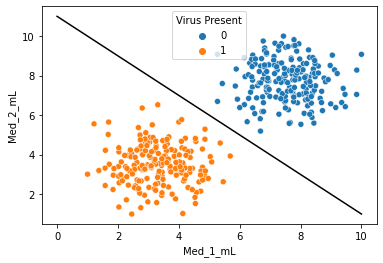

In [8]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)


#HYPERPLANE
x=np.linspace(0,10,100)
m = -1
b = 11

y=m*x+b

plt.plot(x,y,color='black')

In [20]:
from sklearn.svm import SVC

#higher C - lower miscalculations --> higher bias
#lower C, allow more points in the margin, --> lower bias
#higher C , lower points in the margin -->higher bios/lower var

#Bias: Bias describes how well a model matches the training set. 
#    A model with high bias won’t match the data set closely, 
#    while a model with low bias will match the data set very closely. 
#    Bias comes from models that are overly simple and fail to capture 
#    the trends present in the data set.
#Variance: Variance describes how much a model changes when you train 
#    it using different portions of your data set. A model with high 
#    variance will have the flexibility to match any data set that’s 
#    provided to it, potentially resulting in dramatically different 
#    models each time. Variance comes from models that are highly complex, 
#    employing a significant number of features.

In [11]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [12]:
y = df['Virus Present']
X = df.drop('Virus Present',axis =1)

In [13]:
#radial best so auto used
model = SVC(kernel ='linear',C=1000)

In [14]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [15]:
from svm_margin_plot import plot_svm_boundary

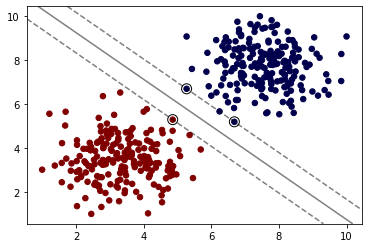

In [16]:
plot_svm_boundary(model,X,y)

In [22]:
model = SVC(kernel='linear',C=00.5)
model.fit(X,y)

SVC(C=0.5, kernel='linear')

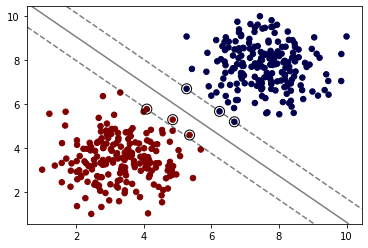

In [23]:
plot_svm_boundary(model,X,y)

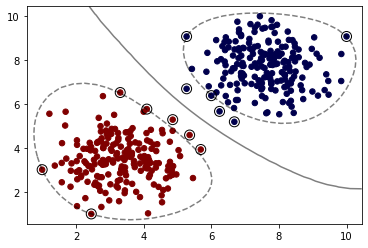

In [24]:
model = SVC(kernel='rbf',C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

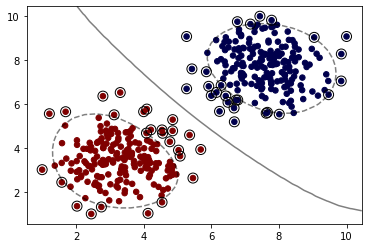

In [26]:
model = SVC(kernel='rbf',C=0.1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

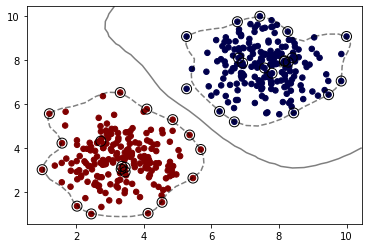

In [33]:
model = SVC(kernel='rbf',C=1,gamma='auto') #scale  - best,more natural
#gamma indicates how much inflence a single trainig value has
#gamma as it gets bigger, makes model overfit to features
model.fit(X,y)
plot_svm_boundary(model,X,y)

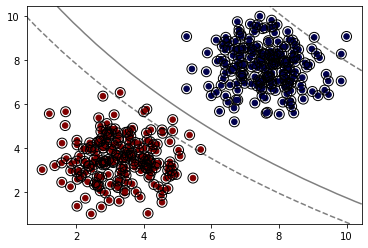

In [32]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

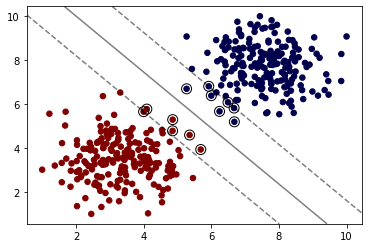

In [34]:
model = SVC(kernel='poly',degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

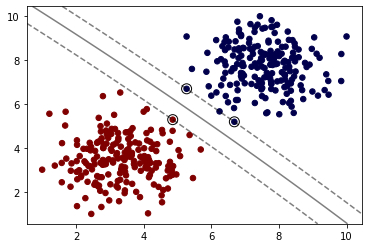

In [35]:
model = SVC(kernel='poly',degree=2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

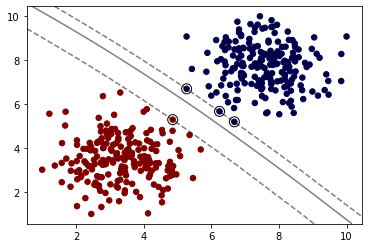

In [38]:
model = SVC(kernel='poly',degree=10)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [39]:
from sklearn.model_selection import GridSearchCV
svm =SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [42]:
grid = GridSearchCV(svm, param_grid=param_grid)

In [43]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [44]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [45]:
##concrete slump test

In [46]:
df = pd.read_csv('../DATA/cement_slump.csv')

In [47]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Figure size 900x600 with 0 Axes>

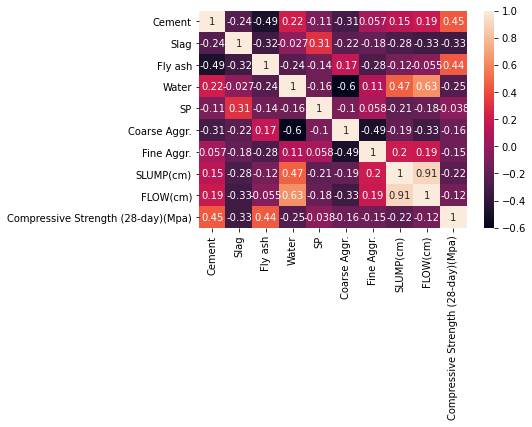

<Figure size 900x600 with 0 Axes>

In [50]:
sns.heatmap(df.corr(),annot=True)
plt.figure(dpi=150)

In [52]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [55]:
#hyperparam - epsilon - how much error willing ot allow for trainnig 
#data instance]]

In [54]:
from sklearn.svm import SVR,LinearSVR
base_model = SVR()
base_model.fit(scaled_X_train,y_train)
base_preds = base_model.predict(scaled_X_test)

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,base_preds)

5.236902091259178

In [57]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [58]:
y_test.mean()

36.26870967741935

In [59]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [62]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [63]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [64]:
grid_preds = grid.predict(scaled_X_test)

In [65]:
mean_absolute_error(y_test,grid_preds)

2.5128012210762365

In [66]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.178210305119858